In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline 

In [2]:
stocks = input("Enter Ticker: ")

Enter Ticker: syaxf


In [3]:
data = yf.download(stocks,"2000-01-01", "2021-09-15", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [46]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-12-18,0.000098,0.000098,0.000098,0.000098,1889
2013-12-19,0.000098,0.000098,0.000098,0.000098,0
2014-04-14,0.000098,0.000098,0.000098,0.000098,10277
2015-07-13,0.019685,0.019685,0.019685,0.019685,3544
2015-07-14,0.019685,0.019685,0.019685,0.019685,0


In [5]:
data.shape

(923, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 923 entries, 2013-12-18 to 2021-09-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    923 non-null    float64
 1   High    923 non-null    float64
 2   Low     923 non-null    float64
 3   Close   923 non-null    float64
 4   Volume  923 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 43.3 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,923.000000,923.000000,923.000000,923.000000,9.230000e+02
mean,0.025870,0.027282,0.024089,0.025760,1.265023e+06
std,0.022997,0.023812,0.021177,0.022510,3.428841e+06
min,0.000098,0.000098,0.000098,0.000098,0.000000e+00
25%,0.007725,0.008000,0.007284,0.008000,3.380000e+04
50%,0.018000,0.019685,0.017000,0.019000,1.650000e+05
75%,0.036000,0.038000,0.033000,0.035950,7.783490e+05
max,0.126000,0.126000,0.120000,0.120000,5.924378e+07


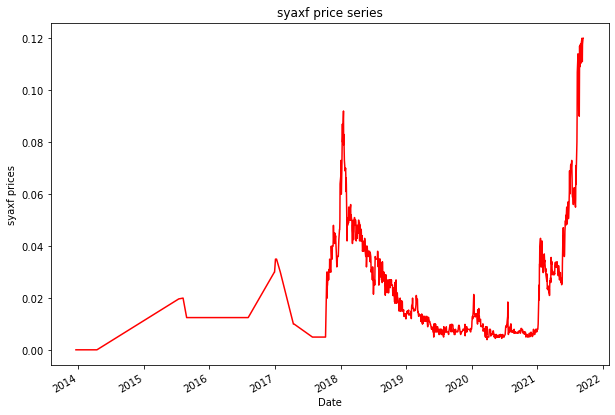

In [8]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} prices".format(stocks))
plt.title("{} price series".format(stocks))
plt.show()

C:\Users\Gabor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

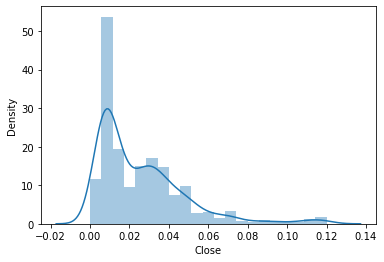

In [9]:
sns.distplot(data.Close)

In [10]:
#sns.displot(data.Close)

In [11]:
#sns.histplot(data.Close)

In [12]:
X = data.drop('Close', axis=1)
y = data.Close

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score 

In [18]:
def calculate_metrics(y_test, y_pred):  
    
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  2.993796103648131e-06
RMSE:-  0.0017302589701105816
R2_score:-  0.9954682856005199


In [19]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\Gabor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.74637e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [20]:
calculate_metrics(y_test, la_p)

MSE:-  0.0006220772872844317
RMSE:-  0.024941477247437283
R2_score:-  0.058360521967026346


In [21]:
calculate_metrics(y_test, ri_p)

MSE:-  0.00016118419787937785
RMSE:-  0.012695833878850883
R2_score:-  0.7560151976921416


In [22]:
from sklearn.svm import SVR


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
svr = SVR()

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [26]:
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [40]:
#svr_pred

In [30]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [44]:
a = np.array([[0.1230,  0.1200,  0.1380 , 1623315]])

In [45]:
model.predict(a)

array([0.07493093])